# Outlier Notebook
### Dawson Pallotta

In [1]:
#!pip install fastdtw 

# this kernel imports different packages to be used and then reads that data that is going to be used in this lab
# it also prints the column names from each of the datasets that have been read into the file
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy import stats
from sklearn.metrics.pairwise import euclidean_distances
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw

dataQ = pd.read_csv("C:/Users/student/Data Minning/surveysDepreST-CAT.csv")
dataSum = pd.read_csv("C:/Users/student/Data Minning/summaryDepreST-CAT.csv")
dataTS = pd.read_csv("C:/Users/student/Data Minning/timeSeriesDepreST-CAT.csv")
dataFE = pd.read_csv("C:/Users/student/Data Minning/featureSet2weeksDepreST-CAT.csv")

print(dataQ.columns)
print(dataSum.columns)
print(dataTS.columns)
print(dataFE.columns)

Index(['id', 'appVersion', 'PHQ - Q1', 'PHQ - Q2', 'PHQ - Q3', 'PHQ - Q4',
       'PHQ - Q5', 'PHQ - Q6', 'PHQ - Q7', 'PHQ - Q8', 'PHQ - Q9',
       'PHQ - Total', 'GAD - Q1', 'GAD - Q2', 'GAD - Q3', 'GAD - Q4',
       'GAD - Q5', 'GAD - Q6', 'GAD - Q7', 'GAD - Total', 'Gender', 'Age',
       'StudentStatus', 'PriorDepressionTreatment', 'Remote', 'COVID', 'Group',
       'Timestamp'],
      dtype='object')
Index(['id', 'inCalls', 'outCalls', 'allCalls', 'inText', 'outText', 'allText',
       'allLogs', 'phq9', 'gad7'],
      dtype='object')
Index(['id', 'inTexts', 'outTexts', 'inCalls', 'outCalls'], dtype='object')
Index(['id', 'inTexts0_Absolute energy', 'inTexts0_Area under the curve',
       'inTexts0_Autocorrelation', 'inTexts0_Centroid',
       'inTexts0_ECDF Percentile Count_0', 'inTexts0_ECDF Percentile Count_1',
       'inTexts0_ECDF Percentile_0', 'inTexts0_ECDF Percentile_1',
       'inTexts0_ECDF_0',
       ...
       'outCalls0_Wavelet variance_2', 'outCalls0_Wavelet varian

<AxesSubplot:>

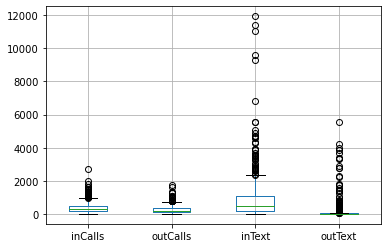

In [2]:
#outlier value in a column
#this plots a wisker and bar plot of the values in the columns of inCalls, outCalls, inText, outText and plots them
#with their statistical outliers being plotted as circles
dataSum.boxplot(column = ["inCalls", 'outCalls', 'inText', 'outText'])

### What does the dataSum boxplot indicate about the number of outliers? What type of outliers?
Every circle on this graph represents an outlier in the dataset, the statistical approach to the outliers don't allow the data to show properly. Since the data itself seems to be skewed using a statistical appraoch has the shortcoming of showinng the data not as accuratly as it can, as most of the outliers show can be used and about only eight of the data points can't be used and would be the real outliers of the group. The type of outliers in this plot are statistical outliers.

### How many outliers do you think there are for inCalls, outCalls, inText, and outText? (not based on pandas) 
I think that of the data was to be looked at not from a statistical standpoint the outliers for the catagories of inCalls, outCalls, inText, and outText from even lokking at them only have a handful of outliers. Looking at the outliers on the graph it appears that inCalls only has one significant outlier, outCalls doesn't appear to have any significant outliers, inText seems to have a maximum of seven outliers, and outText seems to have only one significant outlier as well.

In [3]:
dataSum.sort_values(by = ["inCalls"], ascending = False)
#this produces a data table and sorts the table by the descending values of inCalls

,id,inCalls,outCalls,allCalls,inText,outText,allText,allLogs,phq9,gad7
0,8SEHPRKH5,2699,1635,4334,271,159,430,4764,11,9
1,9UK1BSBLV,1963,37,2000,3497,104,3601,5601,6,1
2,8LOAAXQ52,1820,1319,3139,6806,0,6806,9945,8,5
3,3NL2J473W,1653,347,2000,548,243,791,2791,12,8
4,OVW13SMGC,1648,352,2000,1544,812,2356,4356,3,5
...,...,...,...,...,...,...,...,...,...,...
364,64XV6EVX5,0,21,21,0,3,3,24,3,2
365,QT3M2ARB7,0,0,0,9,0,9,9,1,0
366,LO013DVYO,0,0,0,7,1,8,8,9,1
367,8G5DNILEK,0,0,0,6,1,7,7,0,0


In [4]:
dataSum.sort_values(by = ["outText"], ascending = False)
#takes the above table and orders it by outText values descending 

,id,inCalls,outCalls,allCalls,inText,outText,allText,allLogs,phq9,gad7
58,Q6N7PT68V,679,1320,1999,3444,5569,9013,11012,12,8
20,BHY0R9MA8,1187,813,2000,4878,4232,9110,11110,13,18
338,60RW5873T,31,7,38,2240,3989,6229,6267,4,4
19,HJERN37PE,1192,808,2000,9270,3859,13129,15129,21,19
97,1MZ0A5PA6,459,418,877,4602,3654,8256,9133,15,12
...,...,...,...,...,...,...,...,...,...,...
139,O0PAAK11B,345,181,526,1671,0,1671,2197,4,1
138,E8Q5JF2AE,347,153,500,11044,0,11044,11544,13,14
136,4MZ7HDQ5Y,352,369,721,1680,0,1680,2401,15,17
134,0832IIHPX,356,359,715,634,0,634,1349,7,6


### What is the id of the participant with the most inCalls? outText?
The id of the participant with the most inCalls is 8SEHPRKH5, and the participant with the most outTexts is Q6N7PT68V.

### Compare number of outliers using the 99%, 97.5%, and 95% quantile? Which makes more sense to use?
The 97.5% quantile makes the most sense to use because you are able to see where the spread of the data starts to change more, as weel as giving a sufficiant amount of datapoints for graphing whereas in 99% there isn't enough to see what is actually happening and 95% has to many points to work with.

In [5]:
cutoff = dataSum["inText"].quantile(0.99)
dataSum[dataSum["inText"] > cutoff]
#shows the number of outliers for the category of inText when looking at the quantile of 99%

,id,inCalls,outCalls,allCalls,inText,outText,allText,allLogs,phq9,gad7
28,8WBVV7RX2,1050,950,2000,11423,0,11423,13423,7,7
57,KX7UOVGXW,683,345,1028,11941,0,11941,12969,11,15
113,W5X8EEBRW,416,953,1369,9626,0,9626,10995,26,19
138,E8Q5JF2AE,347,153,500,11044,0,11044,11544,13,14


In [6]:
cutoff = dataSum["inText"].quantile(0.975)
dataSum[dataSum["inText"] > cutoff]
#shows the number of outliers for the category of inText when looking at the quantile of 97.5%

,id,inCalls,outCalls,allCalls,inText,outText,allText,allLogs,phq9,gad7
2,8LOAAXQ52,1820,1319,3139,6806,0,6806,9945,8,5
19,HJERN37PE,1192,808,2000,9270,3859,13129,15129,21,19
20,BHY0R9MA8,1187,813,2000,4878,4232,9110,11110,13,18
21,NCRV5694O,1181,819,2000,5528,1809,7337,9337,21,14
28,8WBVV7RX2,1050,950,2000,11423,0,11423,13423,7,7
57,KX7UOVGXW,683,345,1028,11941,0,11941,12969,11,15
113,W5X8EEBRW,416,953,1369,9626,0,9626,10995,26,19
124,VXP00OA6H,377,122,499,5082,2764,7846,8345,4,6
127,TSK41FGYG,375,114,489,5531,0,5531,6020,3,8
138,E8Q5JF2AE,347,153,500,11044,0,11044,11544,13,14


In [7]:
cutoff = dataSum["inText"].quantile(0.95)
dataSum[dataSum["inText"] > cutoff]
#shows the number of outliers for the category of inText when looking at the quantile of 95%

,id,inCalls,outCalls,allCalls,inText,outText,allText,allLogs,phq9,gad7
2,8LOAAXQ52,1820,1319,3139,6806,0,6806,9945,8,5
16,UZ4BBFC02,1225,775,2000,3865,1415,5280,7280,13,13
19,HJERN37PE,1192,808,2000,9270,3859,13129,15129,21,19
20,BHY0R9MA8,1187,813,2000,4878,4232,9110,11110,13,18
21,NCRV5694O,1181,819,2000,5528,1809,7337,9337,21,14
27,NEXWGJERL,1055,945,2000,4271,0,4271,6271,10,1
28,8WBVV7RX2,1050,950,2000,11423,0,11423,13423,7,7
57,KX7UOVGXW,683,345,1028,11941,0,11941,12969,11,15
62,B1R17ZXQO,634,419,1053,3949,0,3949,5002,9,7
90,5C0978TO8,503,494,997,4645,0,4645,5642,24,21


###  What is the mean number of inText before and after removing outliers? (change noutliers)
The mean number of inText before the removal of the outliers is 999.48, and the number after removing ten outliers is 801.33

In [8]:
#this code sets the amount of outliers that is to be removed from the dataset and then prints the new shapes and sizes of 
# the appened dataset
noutliers = 10
print(sum(sorted(list(dataSum.inText)))/dataSum.shape[0])
print(sum(sorted(list(dataSum.inText))[:-noutliers])/(dataSum.shape[0]-noutliers))

999.4769647696477
801.3314763231198


# Lab Instructions for dataSum

* Continue to add comments and make the notebook professional with headings and markdown cell explanations
* What does the dataSum boxplot indicate about the number of outliers? What type of outliers?
* How many outliers do you think there are for inCalls, outCalls, inText, and outText? (not based on pandas)
* What is the id of the participant with the most inCalls? outText?
* Compare number of outliers using the 99%, 97.5%, and 95% quantile? Which makes more sense to use?
* What is the mean number of inText before and after removing outliers? (change noutliers)

### Update the scatter plot for the number of clusters you think makes the most sense (like last week)?
The amount of clusters that makes the most sense in this scatter plot is four.

(181, 3)
(87, 3)
(88, 3)
(13, 3)


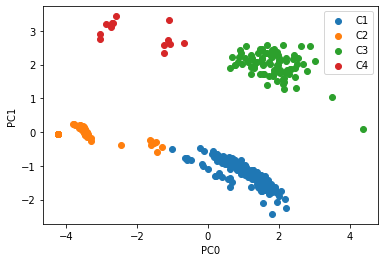

In [9]:
features = dataFE[dataFE.columns[1:-2]]
ids = dataFE[dataFE.columns[0:1]]
targets = dataFE[dataFE.columns[-2:]]
cnames = features.columns

min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(features)
sfeatures = pd.DataFrame(np_scaled, columns = cnames)

numberOfFeatures = 2
pcnames = []
for n in range(0, numberOfFeatures):
    pcnames.append("PC" + str(n))
pca = PCA(n_components=numberOfFeatures)
pca = pca.fit(sfeatures)
X_pca = pca.transform(sfeatures)
pcaDF = pd.DataFrame(X_pca, columns = pcnames)

pcaDFk = pcaDF[["PC0","PC1"]]
k = 4
kmeans = KMeans(n_clusters=k, random_state=0).fit(pcaDFk)
cs = kmeans.labels_
pcaDFk["cluster"] = cs

c0 = pcaDFk[pcaDFk["cluster"] == 0]
print(c0.shape)
c1 = pcaDFk[pcaDFk["cluster"] == 1]
print(c1.shape)
c2 = pcaDFk[pcaDFk["cluster"] == 2]
print(c2.shape)
c3 = pcaDFk[pcaDFk["cluster"] == 3]
print(c3.shape)

plt.figure()
plt.scatter(c0["PC0"], c0["PC1"], label = "C1")
plt.scatter(c1["PC0"], c1["PC1"], label = "C2")
plt.scatter(c2["PC0"], c2["PC1"], label = "C3")
plt.scatter(c3["PC0"], c3["PC1"], label = "C4")
plt.xlabel("PC0")
plt.ylabel("PC1")
plt.legend()
plt.show()
plt.close()
# this sets the clusters by asking for the imput in the amount of clusters that would show up, then having to code for the 
# new clusters to be inputted for the scatter plot, and then plots the scatter plot after using the reading the information
# from the different csv files

In [10]:
centroids = kmeans.cluster_centers_
print(centroids)

pcaDFk.head()
# prints the centrioids of the different clusters and then prints the PCA values of the kmeans of each cluster

[[ 0.95995931 -1.1770152 ]
 [-3.54784398 -0.01817021]
 [ 1.8302356   2.00534043]
 [-2.01161092  2.93466172]]


,PC0,PC1,cluster
0,0.547126,-0.839965,0
1,0.620034,-1.350896,0
2,1.016386,-1.132049,0
3,1.112085,-1.171040,0
4,-3.474177,0.100178,1


In [11]:
distance = []

for i in range(0, pcaDFk.shape[0]):
    point = [pcaDFk["PC0"][i], pcaDFk["PC1"][i]]
    if pcaDFk["cluster"][i] == 0:
        distance.append(round(euclidean_distances([point],[centroids[0]])[0][0],2))
    elif pcaDFk["cluster"][i] == 1:
        distance.append(round(euclidean_distances([point],[centroids[1]])[0][0],2))
    elif pcaDFk["cluster"][i] == 2:
        distance.append(round(euclidean_distances([point],[centroids[2]])[0][0],2))
    elif pcaDFk["cluster"][i] == 3:
        distance.append(round(euclidean_distances([point],[centroids[3]])[0][0],2))

pcaDFk["distance"] = distance
pcaDFk.head()
#takes the table above and adds the distance between the centroids to the table 

,PC0,PC1,cluster,distance
0,0.547126,-0.839965,0,0.53
1,0.620034,-1.350896,0,0.38
2,1.016386,-1.132049,0,0.07
3,1.112085,-1.171040,0,0.15
4,-3.474177,0.100178,1,0.14


### For each cluster, compare the average distance and maximum distance between points and centroid?
The average distance and maximum distance between points and centroids for cluster 0 is: .58 and 2.09, for cluster 1 is .47 and 2.3, for cluster 2 is .6 and 3.18, and for cluster 3 is .93 and 1.37.

In [12]:
dfk0 = pcaDFk[pcaDFk["cluster"] == 0]
dfk1 = pcaDFk[pcaDFk["cluster"] == 1]
dfk2 = pcaDFk[pcaDFk["cluster"] == 2]
dfk3 = pcaDFk[pcaDFk["cluster"] == 3]

print(np.mean(dfk0.distance))
print(np.max(dfk0.distance))
print(np.mean(dfk1.distance))
print(np.max(dfk1.distance))
print(np.mean(dfk2.distance))
print(np.max(dfk2.distance))
print(np.mean(dfk3.distance))
print(np.max(dfk3.distance))
# prints the mean and max values  between the points and centroids of each cluster

0.5790607734806632
2.09
0.46885057471264374
2.3
0.5953409090909091
3.18
0.9284615384615384
1.37


### Which cluster has the most outliers? Explain your reasoning?
The cluster that has the most outliers is cluster 3 because it has the highest mean distance, meaning that it has the highest amount of variance between the points and the centroid of the cluster.

In [13]:
pcaDFk["id"] = ids
mdf = dataSum.merge(pcaDFk, on = ["id"])
mdf.head()
#merdges the dataframe with the PCA dataframe in order to append the distace, PCA's, and clusters to the original dataframe 

,id,inCalls,outCalls,allCalls,inText,outText,allText,allLogs,phq9,gad7,PC0,PC1,cluster,distance
0,8SEHPRKH5,2699,1635,4334,271,159,430,4764,11,9,1.285688,1.969171,2,0.55
1,9UK1BSBLV,1963,37,2000,3497,104,3601,5601,6,1,-1.525214,-0.321328,1,2.05
2,8LOAAXQ52,1820,1319,3139,6806,0,6806,9945,8,5,1.713720,-1.676474,0,0.90
3,3NL2J473W,1653,347,2000,548,243,791,2791,12,8,1.943363,1.523549,2,0.49
4,OVW13SMGC,1648,352,2000,1544,812,2356,4356,3,5,0.864301,2.214721,2,0.99


In [14]:
mdf.sort_values(by = ["distance"], ascending = False)[:10]
#takes the above table and orders it by desceding value of distance 

,id,inCalls,outCalls,allCalls,inText,outText,allText,allLogs,phq9,gad7,PC0,PC1,cluster,distance
129,FANIYNL6M,365,561,926,793,153,946,1872,11,17,4.363766,0.080142,2,3.18
230,PUB9J1B82,220,39,259,123,3,126,385,10,0,-1.286259,-0.436577,1,2.30
78,T7IBUJ9AK,541,173,714,610,0,610,1324,15,16,-1.442323,-0.584268,1,2.18
309,K07YNR8S2,96,72,168,140,0,140,308,13,12,-1.461364,-0.300014,1,2.11
44,U4FU1DQFT,804,136,940,2255,0,2255,3195,1,6,-1.018371,-0.514565,0,2.09
1,9UK1BSBLV,1963,37,2000,3497,104,3601,5601,6,1,-1.525214,-0.321328,1,2.05
87,D8SHI576R,512,472,984,914,0,914,1898,21,21,-1.612777,-0.370296,1,1.97
271,IUGAHUB8Z,163,354,517,599,0,599,1116,12,13,-1.610907,-0.266613,1,1.95
334,CEGGDZ4BQ,36,0,36,22,3,25,61,3,2,-1.626179,-0.233433,1,1.93
58,Q6N7PT68V,679,1320,1999,3444,5569,9013,11012,12,8,3.501763,1.052916,2,1.92


### Are any of the participants who are outliers in this part of the lab correspond to participants with outlying values for inText? outText? inCalls?
It appears that the user with the ID of 9UK1BSBLV seems to be the biggest outlier for all of the categories of inCalls, and inText. And there appears to be some other oputliers in this group for the categories of outText and inText with users Q6N7PT68V and U4FU1DQFT.

# Lab Instructions for dataFE

* Continue to add comments and make the notebook professional with headings and markdown cell explanations
* Update the scatter plot for the number of clusters you think makes the most sense (like last week)
* For each cluster, compare the average distance and maximum distance between points and centroid
* Which cluster has the most outliers? Explain your reasoning
* Are any of the participants who are outliers in this part of the lab correspond to participants with outlying values for inText? outText? inCalls?

In [15]:
#takes the dataframe for the values of out texts and shows a table of the people with the outlying number of texts 
#also creates a new dataframe using the the values of id, ts, max, and count 
idsTS = dataTS["id"]
outTexts = dataTS["outTexts"]
textlist = []
sumlist = []
allvalues = []
maxvalues = []
for row in outTexts:
    templist = row[1:-1].split(',')[:14] #last two weeks
    values = []
    for item in templist:
        values.append(int(item))
        allvalues.append(int(item))
    textlist.append(values)
    sumlist.append(sum(values))
    maxvalues.append(max(values))
    
newDF = pd.DataFrame()
newDF["id"] = idsTS
newDF["ts"] = textlist
newDF["max"] = maxvalues
newDF["count"] = sumlist
print(newDF.shape)
newDF = newDF[newDF["count"] > 0]
print(newDF.shape)
newDF.head()

(369, 4)
(101, 4)


,id,ts,max,count
5,0EZE7RBCS,"[0, 6, 1, 0, 0, 0, 0, 1, 3, 1, 3, 1, 1, 1]",6,18
7,0GJVGLPFD,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]",1,1
9,0NZH3ULXB,"[48, 16, 29, 56, 29, 110, 66, 81, 31, 23, 0, 0...",110,489
11,0XRDYXWOE,"[0, 5, 0, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0]",5,9
13,18BU0T36C,"[5, 1, 17, 24, 16, 9, 4, 2, 4, 0, 0, 0, 2, 8]",24,92


### How many participants are outliers based on the number of texts sent in the last two weeks?
The amount of outliers based on the number of texts is 6 participants.

[1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 5, 6, 6, 6, 6, 6, 6, 7, 8, 9, 9, 9, 9, 10, 10, 10, 12, 12, 13, 15, 15, 15, 15, 15, 16, 16, 16, 17, 17, 17, 18, 18, 19, 23, 23, 25, 27, 28, 28, 31, 32, 32, 33, 35, 36, 37, 38, 39, 41, 44, 49, 49, 53, 54, 55, 56, 57, 58, 59, 62, 64, 68, 79, 84, 91, 91, 92, 93, 95, 151, 153, 153, 163, 168, 174, 183, 255, 266, 330, 370, 489, 599]


<AxesSubplot:>

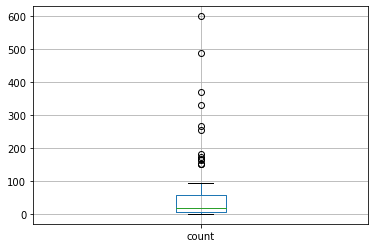

In [16]:
# this prints a pox plot with the values of count which is the number of texts that are sent out
print(sorted(newDF["count"]))
newDF.boxplot(column = ["count"])

### How many participants sent an outlying number of daily texts?
It appears to be that there were a total of two participants that sent an outlying number of daily texts 

[33, 34, 34, 34, 34, 36, 36, 39, 44, 45, 47, 48, 48, 50, 51, 53, 56, 66, 66, 73, 77, 81, 110, 151, 159]


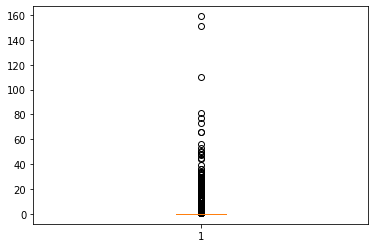

In [17]:
#this kernal sorts the values of the plot above and only includes values over 25
print(sorted(allvalues)[-25:])
plt.boxplot(allvalues)
plt.show()

### Do the participants in the last two bulleted questions overlap or not? What insights can be gleaned from this?
It does appear that the particpants to overlap as the two participants woth an oulying number of daily texts and two of the six participants that are outliers in the number of texts over the last two weeks. Insights that can be taken from this is that people who have a high number of texts in one area have a higher chance of having a high number of texts in another area, ie weekly and daily

In [18]:
#this prints a table sorted by count values and orders them by descending value
newDF.sort_values(by = "count", ascending = False)[:10]

,id,ts,max,count
33,32WU3GTFL,"[2, 36, 48, 159, 151, 73, 39, 24, 10, 2, 1, 26...",159,599
9,0NZH3ULXB,"[48, 16, 29, 56, 29, 110, 66, 81, 31, 23, 0, 0...",110,489
260,P69VZJY2D,"[47, 51, 24, 34, 4, 16, 26, 23, 36, 9, 33, 21,...",51,370
120,C06F1T857,"[15, 34, 16, 0, 22, 44, 25, 53, 0, 8, 77, 5, 1...",77,330
262,P85P0ARF7,"[3, 22, 30, 26, 15, 21, 15, 66, 34, 20, 4, 7, ...",66,266
82,8E9UTS241,"[6, 15, 18, 23, 14, 14, 30, 16, 26, 14, 45, 18...",45,255
35,33WM31B9D,"[18, 12, 1, 16, 10, 16, 16, 9, 3, 16, 18, 20, ...",20,183
166,G2OLGEXS9,"[17, 13, 11, 5, 3, 5, 6, 11, 8, 3, 25, 24, 17,...",26,174
271,Q6N7PT68V,"[11, 20, 14, 15, 30, 7, 9, 17, 4, 16, 8, 6, 7, 4]",30,168
16,1MZ0A5PA6,"[0, 14, 5, 3, 4, 16, 7, 18, 4, 25, 22, 16, 9, 20]",25,163


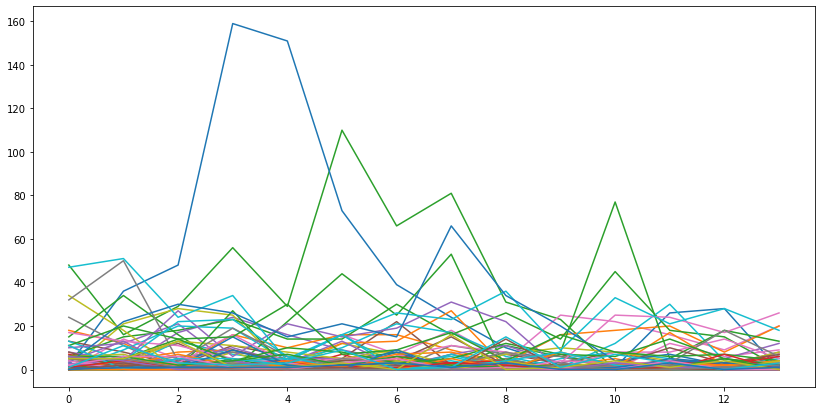

In [19]:
#this graphs the above table
plt.figure(figsize = [14,7])
for ts in newDF.ts:
    plt.plot(ts)

In [20]:
#dtw = dynamic time warping
#this kernal calculates the amount of time that it takes 
%time
avgdist = []
for ts in newDF.ts:
    dist = []
    for ts2 in newDF.ts:
        if ts != ts2:
            distance, path = fastdtw(ts, ts2, dist=euclidean)
            dist.append(distance)
    avgdist.append(sum(dist)/len(dist))

Wall time: 0 ns


### How long does fastdtw code block take to run?
1 minute 10 seconds 

In [21]:
#this prints a table sorted by the values of teh distance between texts values and orders them by descending value
newDF["tsdist"] = avgdist
newDF.sort_values(by = "tsdist", ascending = False)[:10]

,id,ts,max,count,tsdist
33,32WU3GTFL,"[2, 36, 48, 159, 151, 73, 39, 24, 10, 2, 1, 26...",159,599,535.22
9,0NZH3ULXB,"[48, 16, 29, 56, 29, 110, 66, 81, 31, 23, 0, 0...",110,489,428.63
260,P69VZJY2D,"[47, 51, 24, 34, 4, 16, 26, 23, 36, 9, 33, 21,...",51,370,321.72
120,C06F1T857,"[15, 34, 16, 0, 22, 44, 25, 53, 0, 8, 77, 5, 1...",77,330,283.96
262,P85P0ARF7,"[3, 22, 30, 26, 15, 21, 15, 66, 34, 20, 4, 7, ...",66,266,208.20
82,8E9UTS241,"[6, 15, 18, 23, 14, 14, 30, 16, 26, 14, 45, 18...",45,255,198.80
166,G2OLGEXS9,"[17, 13, 11, 5, 3, 5, 6, 11, 8, 3, 25, 24, 17,...",26,174,156.40
35,33WM31B9D,"[18, 12, 1, 16, 10, 16, 16, 9, 3, 16, 18, 20, ...",20,183,155.56
16,1MZ0A5PA6,"[0, 14, 5, 3, 4, 16, 7, 18, 4, 25, 22, 16, 9, 20]",25,163,143.81
271,Q6N7PT68V,"[11, 20, 14, 15, 30, 7, 9, 17, 4, 16, 8, 6, 7, 4]",30,168,141.00


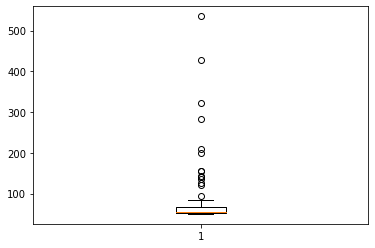

In [22]:
#this plots the above values to a box plot
plt.boxplot(avgdist)
plt.show()

### Do the participants with outlying time series overlap with other outlying participants? Insights?
same peoplle or not from the different types of outlier, statistical, and two more 

# Lab Instructions for dataFE

* Continue to add comments and make the notebook professional with headings and markdown cell explanations
* How many participants are outliers based on the number of texts sent in the last two weeks?
* How many participants sent an outlying number of daily texts?
* Do the participants in the last two bulleted questions overlap or not? What insights can be gleaned from this?
* How long does fastdtw code block take to run?
* How many participants have outlying time series of texts?
* Do the participants with outlying time series overlap with other outlying participants? Insights?